# Сессия 2

### Описание задачи

В этой сессии вы продолжаете работать с данными, подготовленными в предыдущей сессии.
Предобработанные данные предстоит классифицировать и визуализировать зависимости данных.
Какая-либо работа, обусловленная задачами предыдущей сессии, выполненная в ходе текущей,
оцениваться не будет, поэтому проделывайте её только в случае необходимости.

Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    precision_score
)

C:\Users\Les\AppData\Local\Temp\ipykernel_27588\2611249541.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# считывание набора данных
data = pd.read_csv("output.csv")

In [3]:
data

,total_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,RT,LocationID,year,month,day,cluster
0,0.0,0.000,0.0,0.000,111435.417056,0.0,0.000,914.293131,0.0,0.000,...,32.910575,37.746,0.5,0.511,0.000000,0.0,2020.0,1.0,5.0,0
1,0.0,0.000,0.0,0.000,111435.417056,0.0,0.000,914.293131,0.0,0.000,...,32.910575,37.746,0.5,0.511,0.000000,0.0,2020.0,1.0,6.0,0
2,0.0,0.000,0.0,0.000,111435.417056,0.0,0.000,914.293131,0.0,0.000,...,32.910575,37.746,0.5,0.511,0.000000,0.0,2020.0,1.0,7.0,0
3,0.0,0.000,0.0,0.000,111435.417056,0.0,0.000,914.293131,0.0,0.000,...,32.910575,37.746,0.5,0.511,0.000000,0.0,2020.0,1.0,8.0,0
4,0.0,0.000,0.0,0.000,111435.417056,0.0,0.000,914.293131,0.0,0.000,...,32.910575,37.746,0.5,0.511,0.000000,0.0,2020.0,1.0,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383693,266356.0,0.714,0.0,0.286,16320.233000,0.0,0.044,351.643000,0.0,0.018,...,30.700000,36.791,1.7,0.571,1.000014,254.0,2024.0,2.0,28.0,0
383694,266356.0,0.714,0.0,0.286,16320.233000,0.0,0.044,351.643000,0.0,0.018,...,30.700000,36.791,1.7,0.571,1.000019,254.0,2024.0,2.0,29.0,0
383695,266356.0,0.714,0.0,0.286,16320.233000,0.0,0.044,351.643000,0.0,0.018,...,30.700000,36.791,1.7,0.571,1.000014,254.0,2024.0,3.0,1.0,0
383696,266356.0,0.714,0.0,0.286,16320.233000,0.0,0.044,351.643000,0.0,0.018,...,30.700000,36.791,1.7,0.571,1.000009,254.0,2024.0,3.0,2.0,0


## 2.1 Разбиение набора данных

Разделите исходный набор данных на обучающую и тестирующую выборки оптимальным 
образом. Приведите обоснование разбиения

In [4]:
# подготовка двух датасетов: один включает в себя
# всё из начального датасета, кроме целевой переменной 'cluster'
# второй - включает в себя только целевую переменную 'cluster' 
features = data.drop(['cluster'], axis=1)
target = data['cluster']

так как для обучения модели требуется больше данных чем для тестирования, тестовая выборка будет содержать 0,25 данных.

In [5]:
# разбиение наборов данных на обучающуюся и тестирующуюся выборки отношением 75/25
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [6]:
# размерности четырех выборок
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape)

(287773, 30) (95925, 30) (287773,) (95925,)


## 2.2 Визуализация зависимостей данных

Используя программные средства, визуализируйте зависимости атрибутов в наборе данных. 
Визуализация должна отражать влияние атрибутов на определение классов – уровня опасности 
посещения страны для туриста. Произведите расчеты зависимостей по выбранным алгоритмам.
Приведите интерпретацию полученным результатам

<Axes: xlabel='cluster', ylabel='count'>

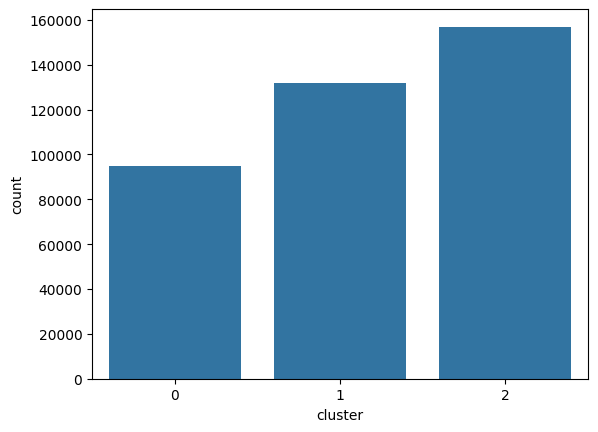

In [7]:
# соотношение количества записей в зависимости от кластера
sns.countplot(x = 'cluster', data = data)

классы кластеров распределены неравномерно

In [8]:
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier

**f_classif** - это метод, используемый для оценки важности признаков на основе анализа дисперсии между классами в задачах классификации. Он вычисляет F-статистику для каждого признака и его целевой переменной и затем преобразует ее в оценку значимости признака. Большие значения F-статистики и малые p-значения указывают на более значимый признак.

**ExtraTreesClassifier** - это алгоритм, который использует метод "Extremely Randomized Trees" (Extra Trees) для классификации данных. Он является вариацией алгоритма случайного леса, но с двумя ключевыми различиями: первое, разделение узлов в деревьях происходит на случайных подмножествах признаков, и второе, вместо поиска наилучшего разделения, случайные разделения используются на каждом узле.

In [9]:
clf = ExtraTreesClassifier(n_estimators=50)
# features - матрица признаков, target - вектор целевой переменной
clf = clf.fit(features, target)
clf.feature_importances_

array([0.04486774, 0.03239622, 0.01105152, 0.04410588, 0.05518798,
       0.01263013, 0.02950375, 0.05487602, 0.01295741, 0.05375587,
       0.01278936, 0.02401818, 0.02240401, 0.01551548, 0.02836345,
       0.01309161, 0.11049855, 0.0471604 , 0.02461391, 0.02951172,
       0.02652913, 0.01980739, 0.0509809 , 0.02460017, 0.11020516,
       0.0131217 , 0.01303844, 0.04604738, 0.01283634, 0.00353418])

In [10]:
df_features_importances = pd.DataFrame({"feature": data.drop(["cluster"], axis=1).columns, "importance": clf.feature_importances_})
df_features_importances

,feature,importance
0,total_cases,0.044868
1,new_cases_smoothed,0.032396
2,new_deaths,0.011052
3,new_deaths_smoothed,0.044106
4,total_cases_per_million,0.055188
5,new_cases_per_million,0.012630
6,new_cases_smoothed_per_million,0.029504
7,total_deaths_per_million,0.054876
8,new_deaths_per_million,0.012957
9,new_deaths_smoothed_per_million,0.053756


<Axes: xlabel='feature', ylabel='importance'>

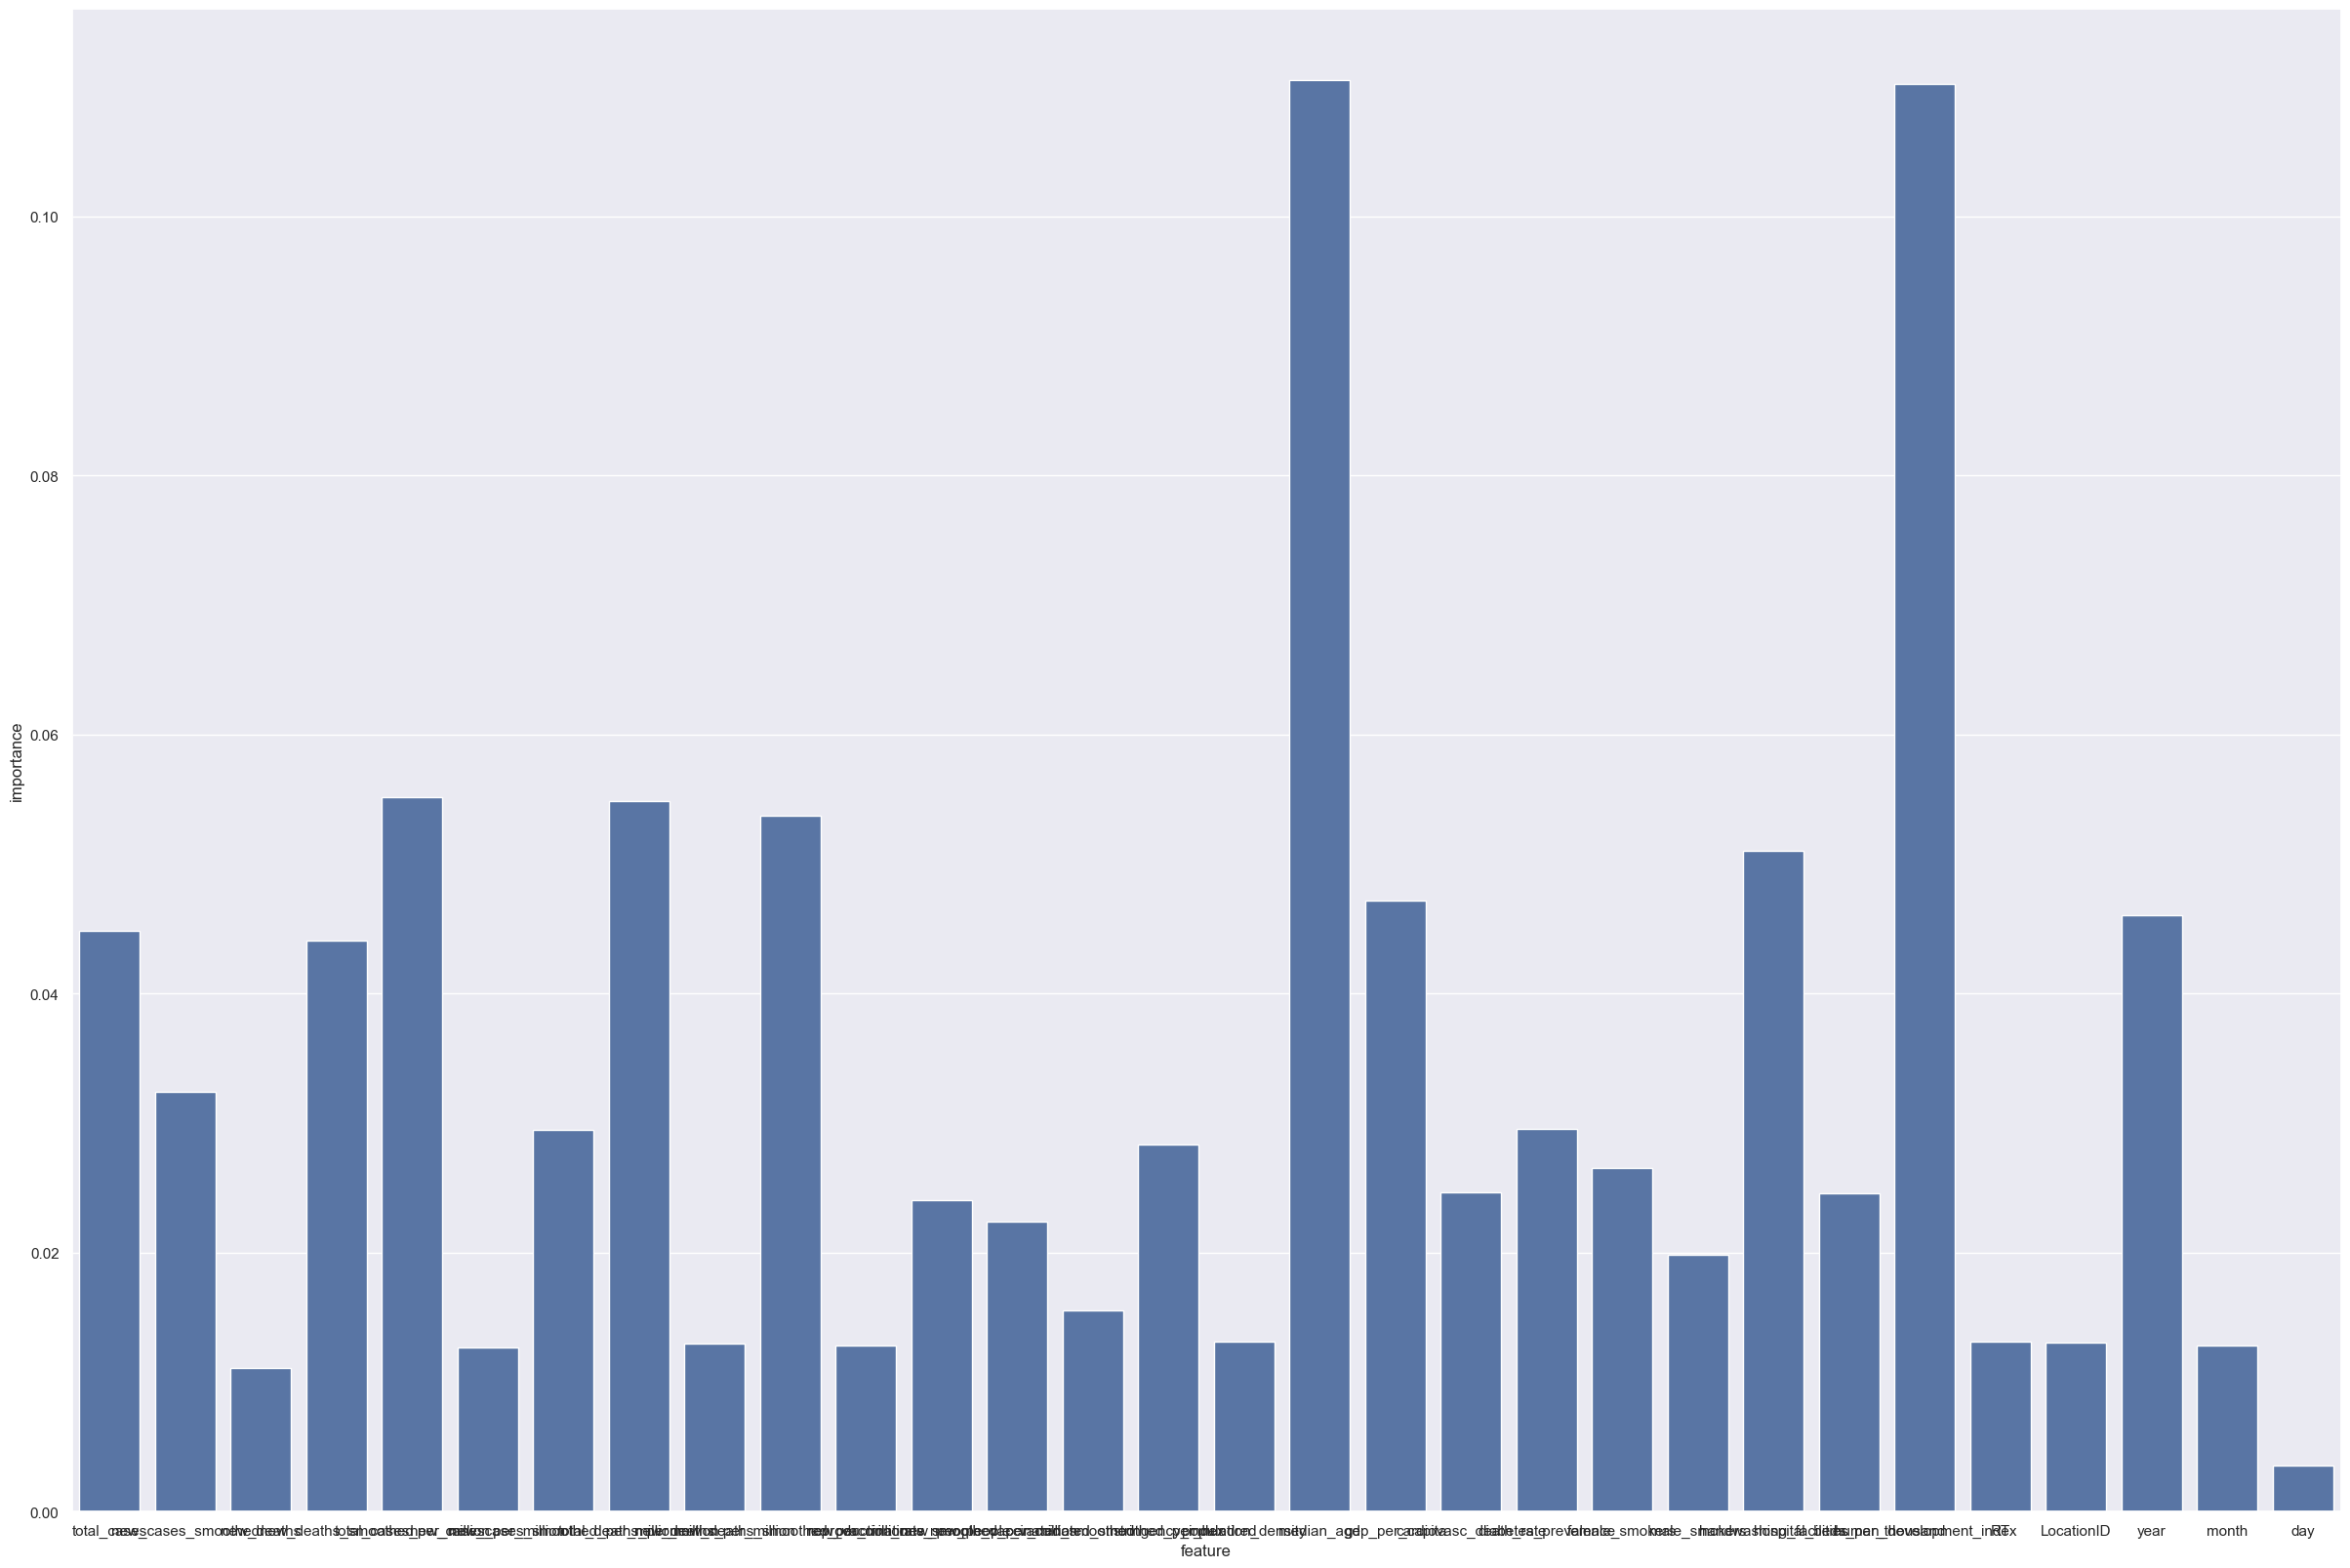

In [11]:
sns.set(rc={'figure.figsize':(30,20)})
sns.barplot(data=df_features_importances, x="feature", y="importance")

здесь чем ниже число importance, тем меньше оно влияет оно на целевую переменную.

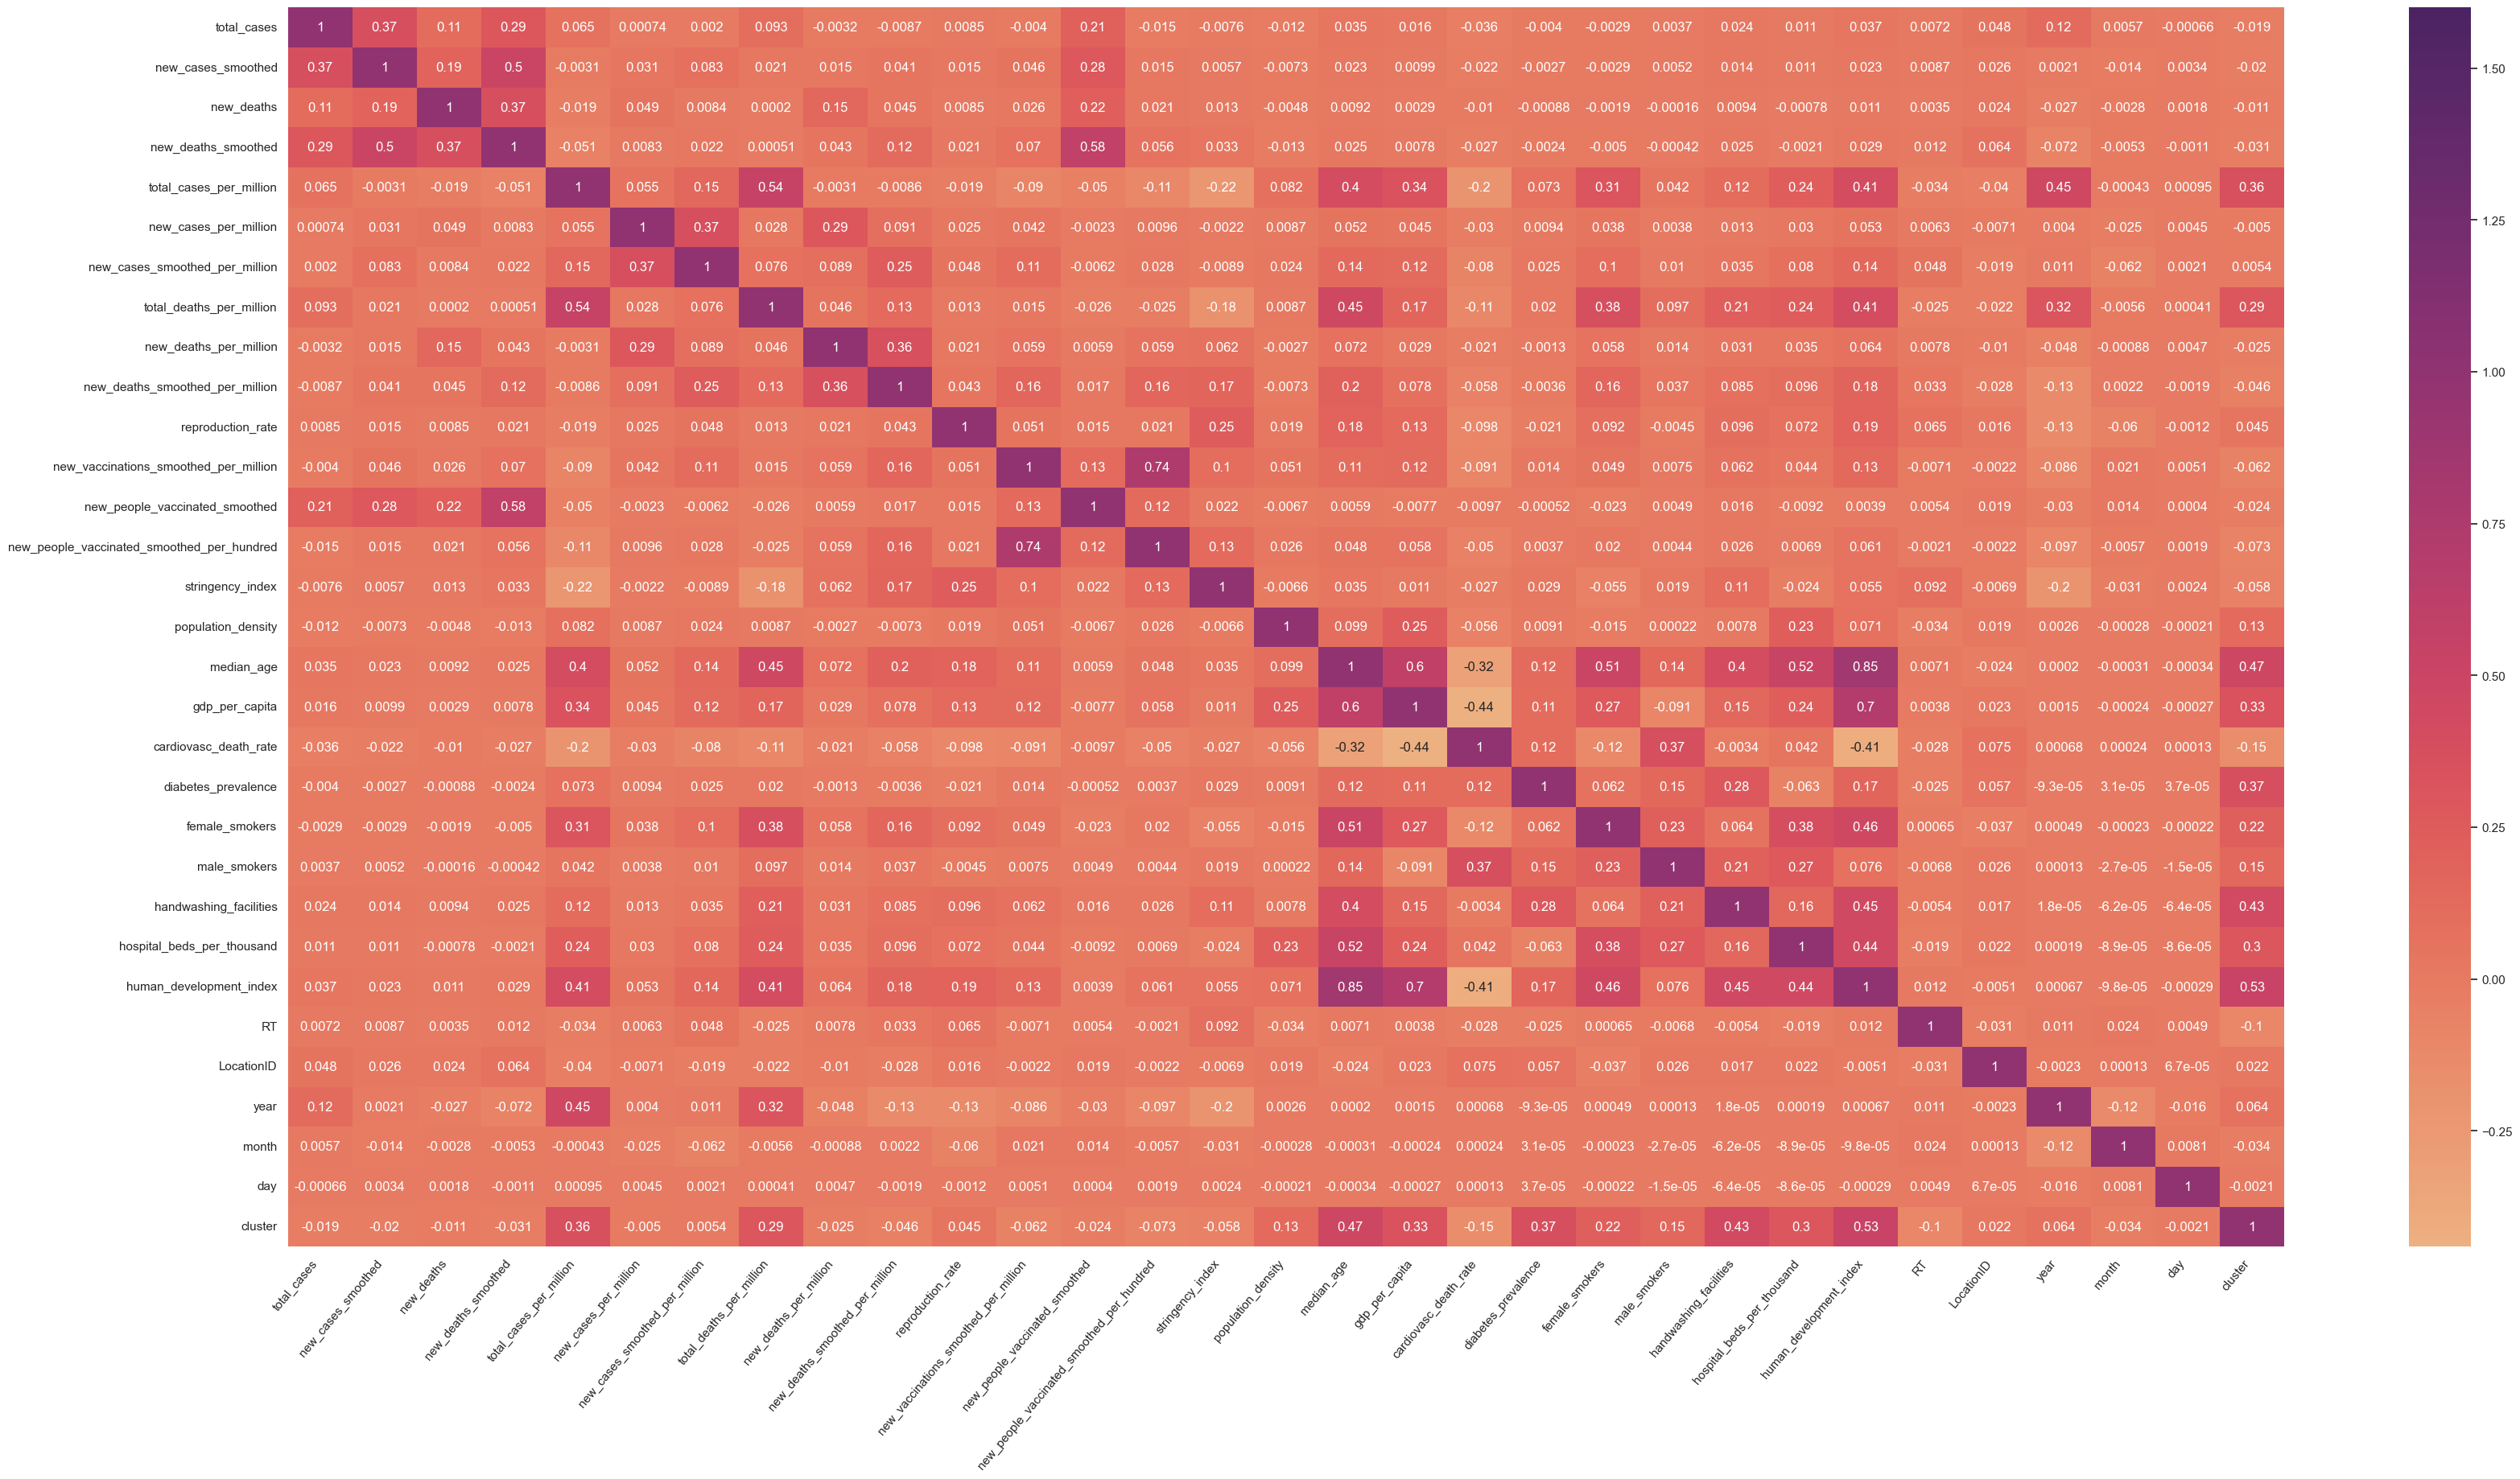

In [12]:
# схема зависимостей между столбцами
plt.figure(figsize = (40, 20))
sns.heatmap(data.corr(),cmap = sns.color_palette("flare", as_cmap=True),annot = True,vmax = 1.6);
plt.xticks(rotation=50, ha='right');

pd.plotting.scatter_matrix() используется для построения матрицы scatterplot для всех числовых признаков в наборе данных. каждая ячейка на диагонали будет представлять собой гистограмму распределения соответствующего признака, а ячейки вне диагонали будут содержать scatterplot, показывающий взаимосвязи между соответствующими парами признаков.

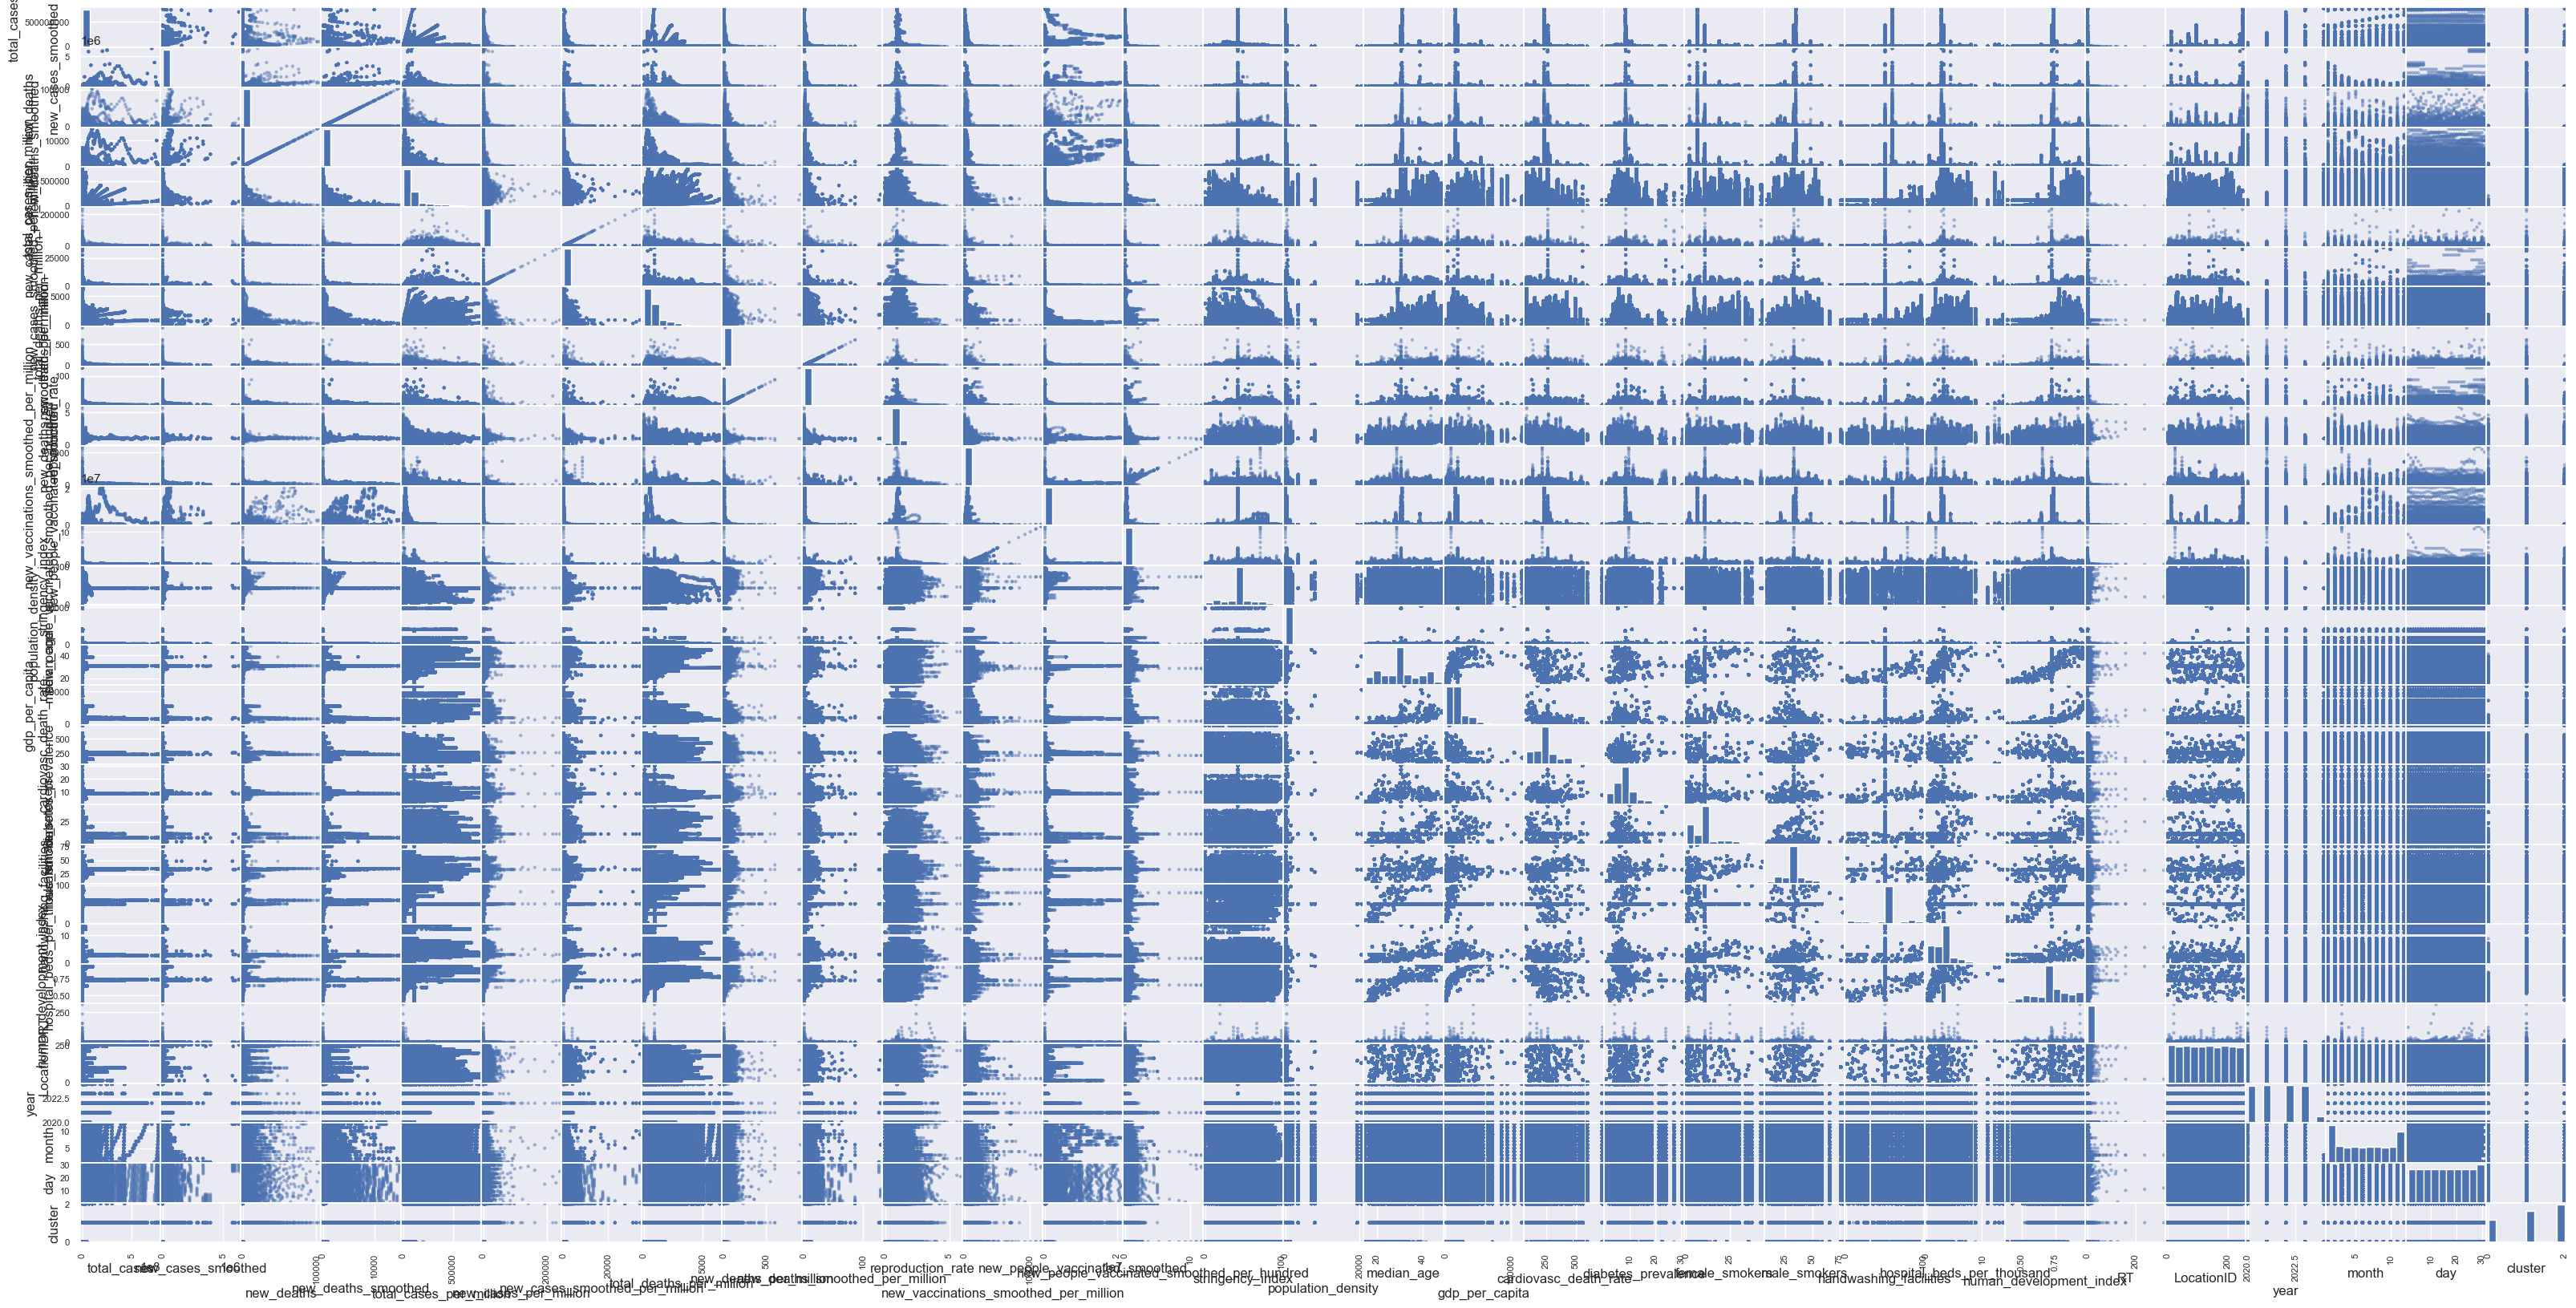

In [14]:
pd.plotting.scatter_matrix(data, figsize=(40,20));

sns.pairplot() используется для создания сетки графиков, которая показывает попарные отношения между различными признаками в наборе данных. помогает визуализировать взаимосвязи между всеми числовыми признаками, а также распределения каждого признака на диагонали.

In [ ]:
sns.pairplot(data)

MemoryError: Unable to allocate 2.93 MiB for an array with shape (383698,) and data type float64

In [ ]:
data.columns

## 2.3 Классификация исходных компетенций

Выберите модель классификации данных по уровням опасности посещения для туристов. 
Приведите обоснование выбора модели. 

## 2.4 Обучение

Проведите обучение выбранной модели на обучающей выборке. Протестируйте работу 
обученной модели на тестовой выборке. Определите показатели точности работы выбранной 
модели, сравните с остальными рассматриваемыми моделями.

### Метрики

Матрица ошибок (Confusion Matrix) - это инструмент в задачах классификации, который позволяет визуализировать производительность алгоритма путем сравнения фактических меток классов с предсказанными метками классов. Имеет следующий формат:
    True Positive (TP): Количество объектов, которые были правильно классифицированы как класс X.
    False Positive (FP): Количество объектов, которые были неправильно классифицированы как класс X.
    False Negative (FN): Количество объектов, которые были неправильно классифицированы как не класс X.
    True Negative (TN): Количество объектов, которые были правильно классифицированы как не класс X.

Функция accuracy_score из библиотеки scikit-learn используется для вычисления точности модели классификации.

Точность - это простая метрика, которая показывает долю правильно классифицированных примеров относительно общего количества примеров.

Формула для вычисления точности:
Accuracy=Количество правильно классифицированных примеров / Общее количество примеров

Эта метрика полезна для оценки общей производительности модели классификации.

### KNN

Принцип работы K-Nearest Neighbors (k-ближайших соседей, KNN)  заключается в том, что для каждого нового объекта (точки данных) вычисляется его расстояние до всех остальных объектов в обучающем наборе. Затем выбирается k ближайших соседей этой точки. В случае классификации, прогноз для новой точки вычисляется путем применения механизма голосования: объект относится к классу, который наиболее часто встречается среди его k ближайших соседей. В случае регрессии, прогнозное значение вычисляется как среднее (или медианное) значение целевой переменной для k ближайших соседей.

In [13]:
knn = KNeighborsClassifier()
# обучение модели
knn.fit(features_train, target_train)

# используем обученную модель knn для 
# предсказания классов на тестовом наборе данных
knn_predict = knn.predict(features_test)

print("Точность:", accuracy_score(knn_predict, target_test))
print("Матрица ошибок:", confusion_matrix(knn_predict, target_test))

Точность: 0.9764503518373729
Матрица ошибок: [[23473   329   103]
 [  107 31329   259]
 [  191  1270 38864]]


### Random forest classifier

Основные принципы работы случайного леса:

Бутстрэп выборка (Bootstrap Sampling): Создается множество случайных подвыборок с повторениями из обучающего набора данных.

Построение деревьев решений (Decision Trees): На каждой подвыборке строится отдельное дерево решений. При этом каждое дерево строится независимо друг от друга, используя только часть признаков (случайный подмножество признаков).

Голосование (Voting): Предсказания всех деревьев объединяются для получения итогового предсказания. В случае классификации выбирается класс, который получает наибольшее количество голосов, а в случае регрессии используется усредненное значение предсказаний.

In [14]:
rfc = RandomForestClassifier()
# обучение модели
rfc.fit(features_train, target_train)

# используем обученную модель knn для 
# предсказания классов на тестовом наборе данных
rfc_predict = rfc.predict(features_test)

print("Точность:", accuracy_score(rfc_predict, target_test))
print("Матрица ошибок:", confusion_matrix(rfc_predict, target_test))

Точность: 0.9961323951003388
Матрица ошибок: [[23679    71    27]
 [   21 32746    70]
 [   71   111 39129]]


### Decision Tree Classifier

Принцип работы классификатора на основе дерева решений:

Построение дерева решений: Начиная с корня дерева, выбирается признак, который лучше всего разделяет данные. Затем данные разделяются на два подмножества в соответствии с выбранным признаком. Этот процесс повторяется рекурсивно для каждого подмножества до тех пор, пока все данные не будут классифицированы или пока не будет достигнут критерий остановки.

Принятие решений: Каждый лист дерева соответствует классу, к которому относятся объекты в соответствующем регионе. При классификации нового объекта происходит его проход через дерево до тех пор, пока не будет достигнут лист, который определяет его класс.

In [15]:
dtc = DecisionTreeClassifier()
# обучение модели
dtc.fit(features_train, target_train)

# используем обученную модель knn для 
# предсказания классов на тестовом наборе данных
dtc_predict = dtc.predict(features_test)

print("Точность:", accuracy_score(dtc_predict, target_test))
print("Матрица ошибок:", confusion_matrix(dtc_predict, target_test))

Точность: 0.9947771696637998
Матрица ошибок: [[23651    93    44]
 [   65 32710   119]
 [   55   125 39063]]


<Axes: title={'center': 'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

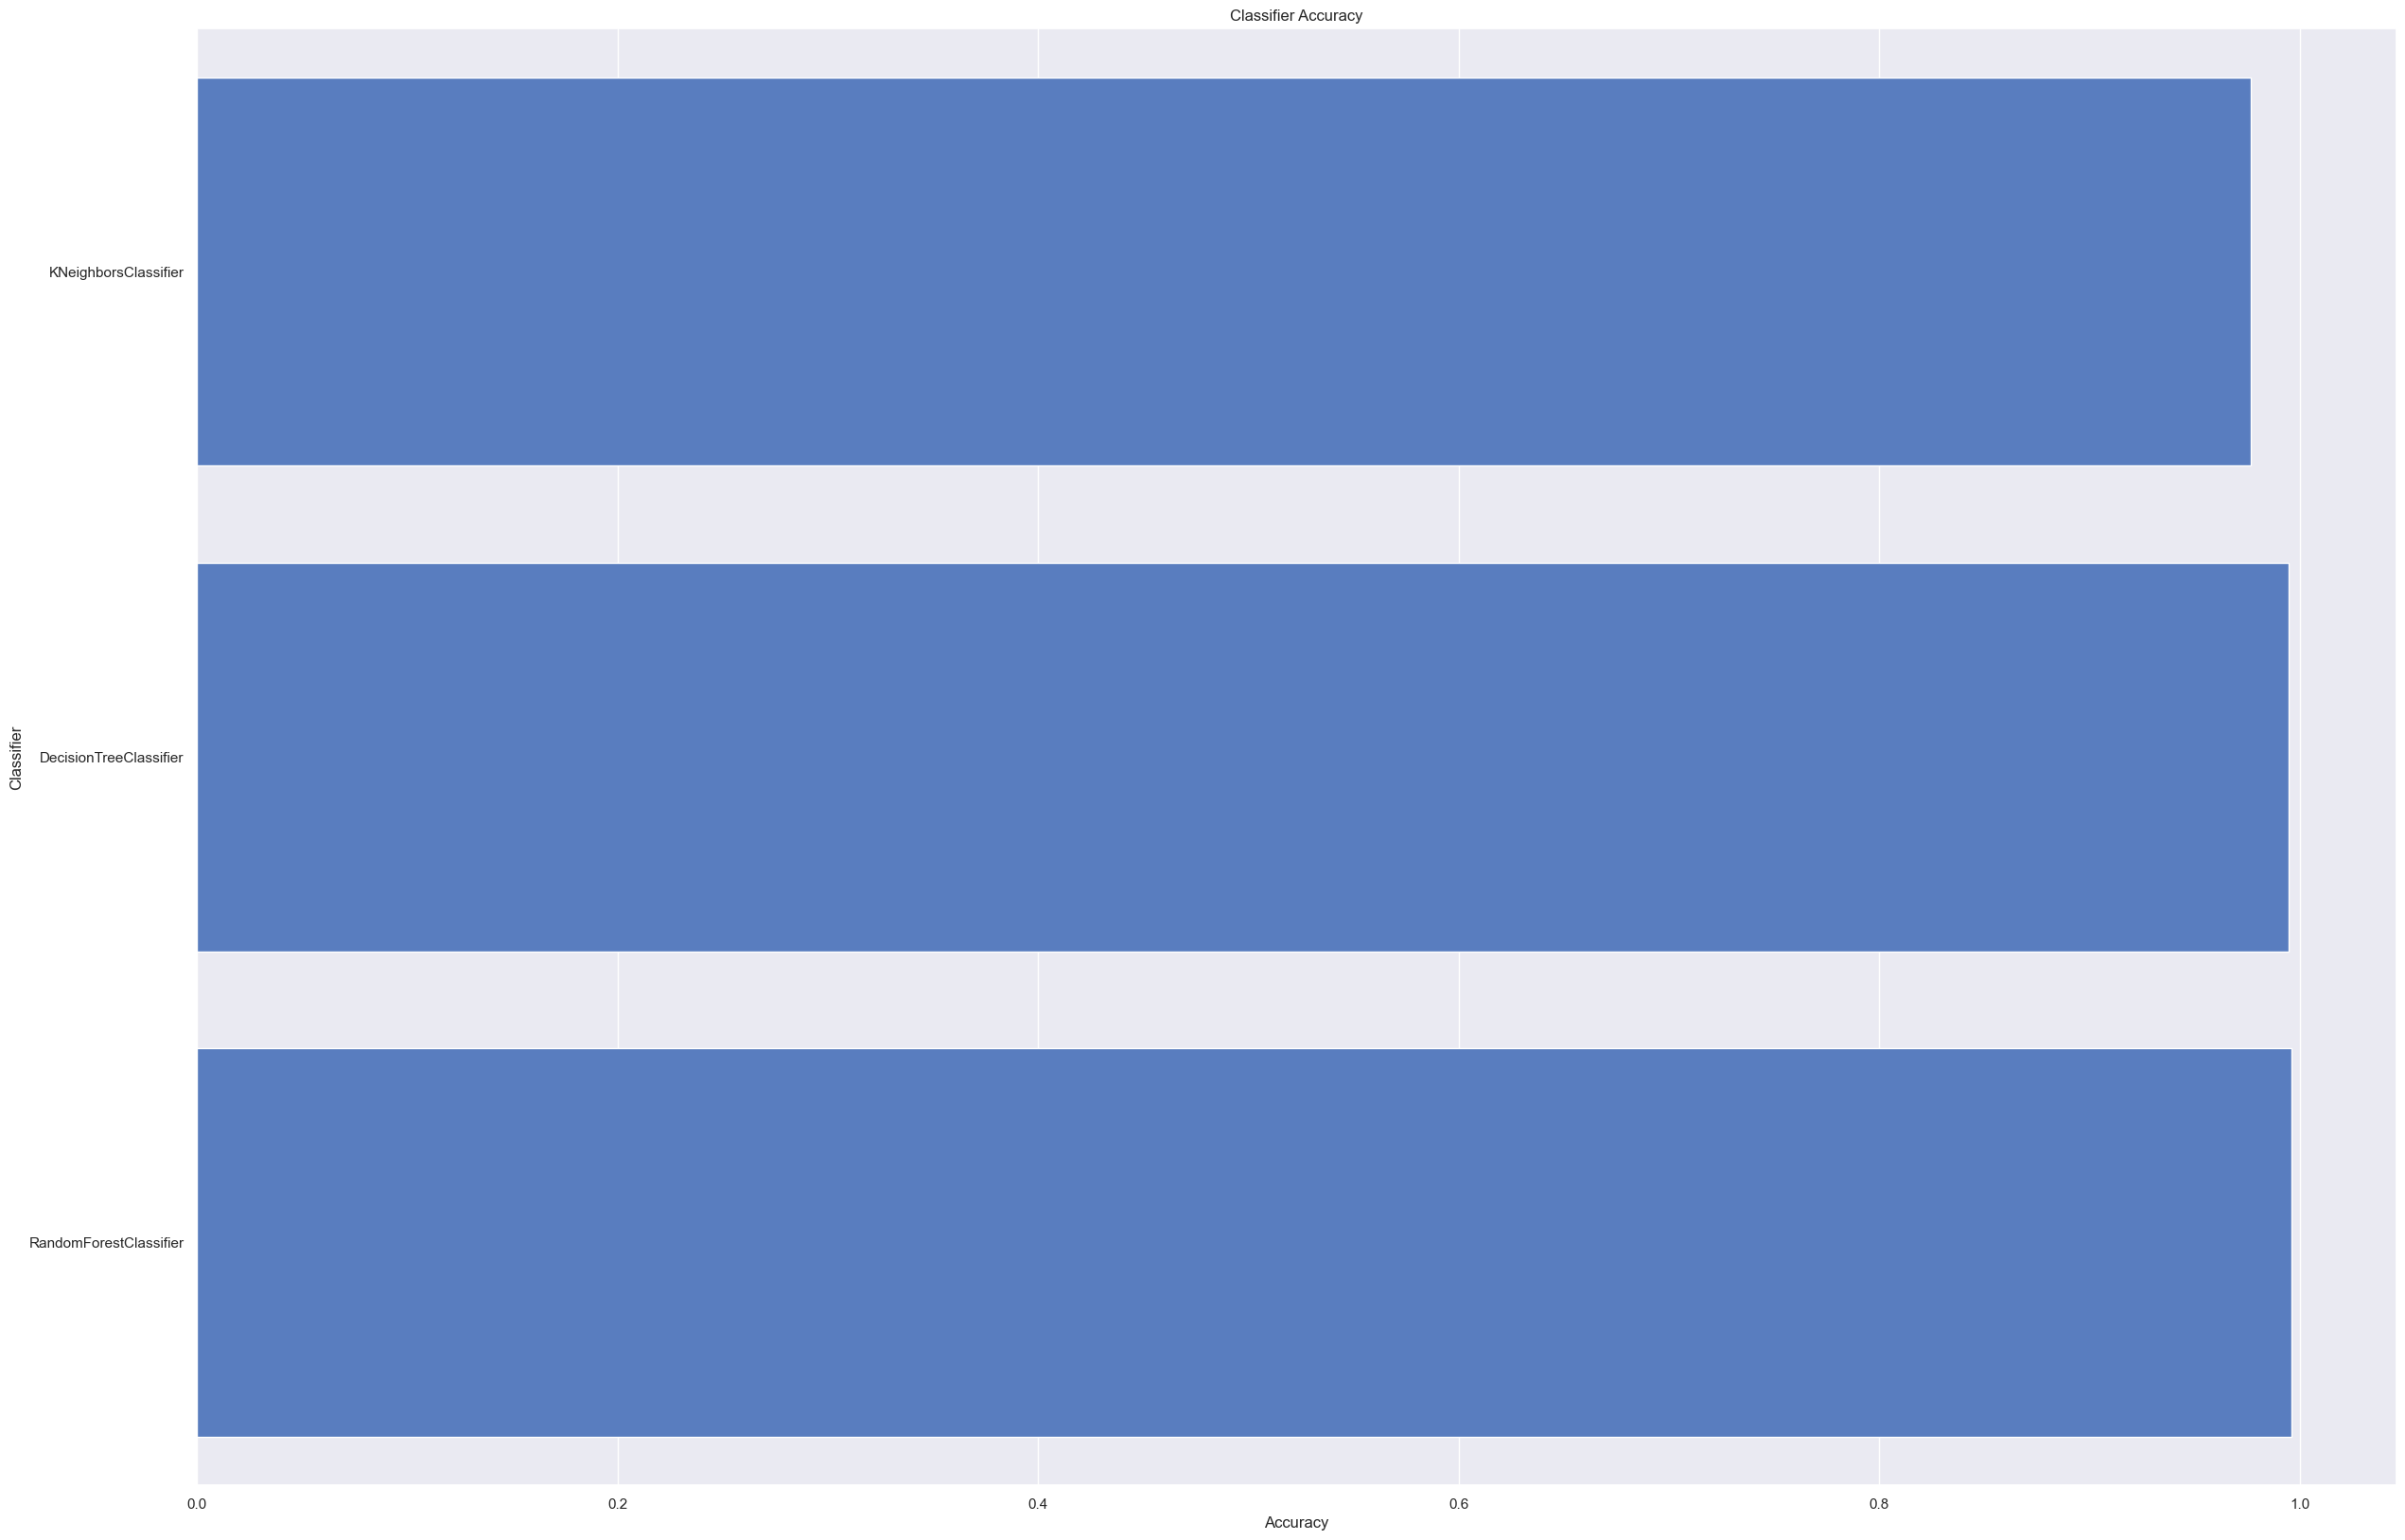

In [16]:
# определение классификаторов
classifiers = [
    KNeighborsClassifier(5),
    RandomForestClassifier(),
    DecisionTreeClassifier()
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

for clf in classifiers:
	name = clf.__class__.__name__
#     выполняется обучение модели
	clf.fit(features_train, target_train)
#     выполняются предсказания для тестового набора данных
	train_predictions = clf.predict(features_test)
#     вычисляется точность модели
	acc = accuracy_score(target_test, train_predictions)
	if name in acc_dict:
		acc_dict[name] += acc
	else:
		acc_dict[name] = acc

# округление точности
for clf in acc_dict:
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = pd.concat([log, log_entry], ignore_index=True)

#     визуализация результата
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

In [17]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.976450
1,RandomForestClassifier,0.995986
2,DecisionTreeClassifier,0.994756


На основании результатов оценки моделей с использованием метрики accuracy_score, можно сделать вывод, что KNeighborsClassifier демонстрирует наилучшую сбалансированную производительность среди рассмотренных классификаторов. Это означает, что модель случайного леса лучше всего справляется с предсказанием классов для новых данных в сравнении с другими моделями, такими как KNeighborsClassifier и RandomForestClassifier, так как модели с точностью равной 99% не устойчивы к новым данным с неравномерным распределением, то есть модель будет неправильно распределять данные с выбросами. В нашем случае это очень важно, так как распределение заболеваний болезни неравномерно, особенно сейчас, так как Covid 19 мутировал, изменив свои показатели распространения и смертности.

## 2.5 Feature Engineering

Путём преобразования набора данных, добейтесь более точной работы выбранной модели. 
Опишите приемы генерации новых данных и результаты, к которым они привели, рассматривая
все ранее определенные показатели точности

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383698 entries, 0 to 383697
Data columns (total 31 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   total_cases                                 383698 non-null  float64
 1   new_cases_smoothed                          383698 non-null  float64
 2   new_deaths                                  383698 non-null  float64
 3   new_deaths_smoothed                         383698 non-null  float64
 4   total_cases_per_million                     383698 non-null  float64
 5   new_cases_per_million                       383698 non-null  float64
 6   new_cases_smoothed_per_million              383698 non-null  float64
 7   total_deaths_per_million                    383698 non-null  float64
 8   new_deaths_per_million                      383698 non-null  float64
 9   new_deaths_smoothed_per_million             383698 non-null  float64
 

Для улучшения данных воспользуемся GridSearchCV, для поиска наилучших гипепараметров модели, в качестве модели возьмём наиболее сбалансированную KNeighborsClassifier. Для скалирования данных воспользуемся методом Yeo-Johnson, так как именно его мы использовали для скалирования данных в первой модели.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [25]:
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)


# create a RandomForestClassifier object
clf = KNeighborsClassifier()

# define the hyperparameters to search over
param_grid = {'n_neighbors': [3, 5, 7],
              'leaf_size': [10, 20, 30],
              'metric': ['euclidean', 'manhattan', 'minkowski']}

# create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1, refit=True)

# fit the GridSearchCV object to the training data
grid_search.fit(features_train_scaled, target_train)

# print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# use the best hyperparameters to train a new model on the entire dataset
best_clf = grid_search.best_estimator_
best_clf.fit(features_train_scaled, target_train)

# evaluate the performance of the model on the testing data
accuracy = best_clf.score(features_test_scaled, target_test)
print('Test accuracy:', accuracy)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best hyperparameters: {'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 3}
Test accuracy: 0.9812457649205109


После улучшения модели через GridSearchSV мы получили модель с точностью 0.9993037330619677, т.е. её точность составляет 99.99%. Такая большая точность это не очень хорошо, но что получили то и получили, т.к. все три метрики показали примерно 99+%.

Просмотрим текущие выбранные гиперпараметры модели

In [26]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Воспользуемся другим методом поиска оптимальных гиперпараметров, а именно RandomizedSearchCV

In [28]:
from sklearn.model_selection import RandomizedSearchCV

# create a KNeighborsClassifier object
clf = KNeighborsClassifier()

# define the hyperparameters to search over
param_dist = {'n_neighbors': [3, 5, 7],
              'leaf_size': [10, 20, 30],
              'metric': ['euclidean', 'manhattan', 'minkowski']}

# create a RandomizedSearchCV object
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, cv=3, scoring='accuracy', n_jobs=-1, verbose=1, refit=True, n_iter=10)

# fit the RandomizedSearchCV object to the training data
random_search.fit(features_train_scaled, target_train)

# print the best hyperparameters
print('Best hyperparameters:', random_search.best_params_)

# use the best hyperparameters to train a new model on the entire dataset
best_clf = random_search.best_estimator_
best_clf.fit(features_train_scaled, target_train)

# evaluate the performance of the model on the testing data
accuracy = best_clf.score(features_test_scaled, target_test)
print('Test accuracy:', accuracy)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters: {'n_neighbors': 3, 'metric': 'minkowski', 'leaf_size': 20}
Test accuracy: 0.980276257492833


## 2.6 Подготовка отчёта

### 2.1 Разбиение набора данных

1. Разбиваем данные на две части: 1-ая часть это целевая переменная (у нас это атрибут кластер), 2-ая часть это все остальные атрибуты, в которые не входит целевая переменная.
2. Делаем для тестовой выборки 0.25 от исходных данных, т.к. тестовая часть требует меньше данных.
3. Получили размерность четырёх выборок: (280063, 19) (93355, 19) (280063,) (93355,)

В результате мы разделили исходный набор данных на две части и сделали четыре выборки с разными размерами, в будущем нам они пригодятся для обучения модели.

### 2.2 Визуализация зависимостей данных

1. Делаем графическое представление атрибута кластер (смотрим кол-во 1-ых, 2-ых и 3-их кластеров)
2. Выделяем важные атрибуты для обучения модели и строим по ним графики, которые показывают важность каждого атрибута (barplot, heatmap, scatter_matrix, pairplot)
3. Строим графики гистограмм для каждого признака и сравниваем разницу между распределениями до и после устранения пропусков
4. Преобразуем категориальные признаки в числовые
5. Делаем отбор значимых признаков

В результате мы выделили важные атрибуты для обучения нашей модели, и получили такой датасет с атрибутами: 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'population_density', 'aged_65_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 'life_expectancy', 'human_development_index', 'population', 'RT', 'cluster'.

### 2.3 Классификация исходных компетенций

1. Сразу переходим к пункту 2.4

В результате мы пропустили этот пункт, т.к. основная его часть будет содержаться в 2.4

### 2.4 Обучение

1. Обучаем модель через K-Nearest Neighbors
2. Обучаем модель через RandomForestClassifier 
3. Обучаем модель через DecisionTreeClassifier
4. Строим каждый график который будет показывать точность каждого классификатора, и найдём классификатор с самой большой точностью

В результате на основании результатов оценки моделей с использованием метрики accuracy_score, можно сделать вывод, что RandomForestClassifier демонстрирует наилучшую производительность среди рассмотренных классификаторов. это означает, что модель случайного леса лучше всего справляется с предсказанием классов для новых данных в сравнении с другими моделями, такими как KNeighborsClassifier и RandomForestClassifier.В результате 

### 2.5 Feature Engineering

1. Для лучшей модели из 2.4 мы делаем переобучение через GridSearchSV

В результате после улучшения модели через GridSearchSV мы получили модель с точностью 0.9993037330619677, т.е. её точность составляет 99.99%. Такая большая точность это не очень хорошо, но что получили то и получили, т.к. все три метрики показали примерно 99+%.

### 2.6 Подготовка отчёта

Подготовим результирующий файл Data.zip который будет содержать данные полученного датасета в формате csv и файл этого notebook'a в формате ipynb и html.

In [ ]:
import zipfile # для архивации
import nbformat
from nbconvert import HTMLExporter

# Записать DataFrame в CSV файл
csv_file = 'data2.csv' # Имя файла, который мы хотим создать
data.to_csv(csv_file, index=False)

# Создание переменной с файлом notebook'a
ipynb_file = 'Damir_Session2.ipynb'

# Конвертирование .ipynb в .html
html_exporter = HTMLExporter()
html_exporter.template_name = 'classic'

# Загрузить содержимое .ipynb файла
with open(ipynb_file, 'r', encoding='utf-8') as f:
    notebook_content = nbformat.reads(f.read(), as_version=4)
    
# Конвертирование в HTML
(body, resources) = html_exporter.from_notebook_node(notebook_content)

# Запись HTML в файл
html_file = ipynb_file.replace('.ipynb', '.html')
with open(html_file, 'w', encoding='utf-8') as f:
    f.write(body)
    
# Создание строки со содержанием для README.md
readme_content = """
## Содержимое архива

**data2.csv** - результирующий набор данных, полученный в конце первой сессии.
**Damir_Session2.ipynb** - файл в формате ipynb, содержащий визуальную часть и логическую (код) часть, в котором присутствует полный ход работы на первой сессии.
**Damir_Session2.html** - файл в формате html, содержащий визуальную часть и логическую (код) часть, в котором присутствует полный ход работы на первой сессии.
**README.md** - файл, в котором содержится описание всех файлов в zip-архиве Data.zip.
"""

# Создание файла README.md и запись в него содержимого
readme_file = 'README.md'
with open(readme_file, 'w', encoding='utf-8') as f:
    f.write(readme_content.strip())

# Архивировать CSV файл в ZIP-архив
zip_file = 'Data.zip' # Имя создаваемого архива

# Создание архива и добавление файлов
with zipfile.ZipFile(zip_file, 'w') as zip:
    zip.write(csv_file, arcname=csv_file)
    zip.write(ipynb_file, arcname=ipynb_file)
    zip.write(html_file, arcname=html_file)
    zip.write(readme_file, arcname=readme_file)

# После этого 'Data.zip' будет содержать 'data2.csv', 'Damir_Session2.ipynb', 'Damir_Session2.html' и 'README.md'